In [2]:
import numpy as np
import matplotlib.pyplot as plt
from Utils.info import getinfo
import sigpy.mri as mr
from Utils.GenMask import gen_mask
import sigpy as sp

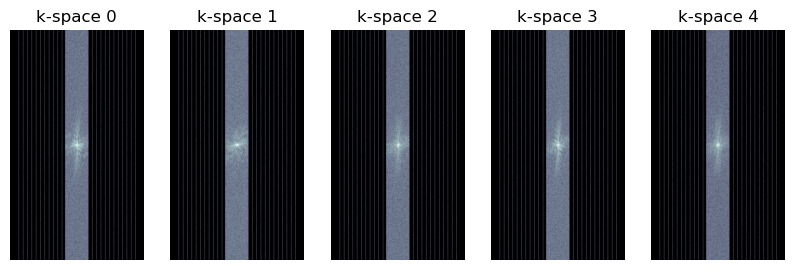

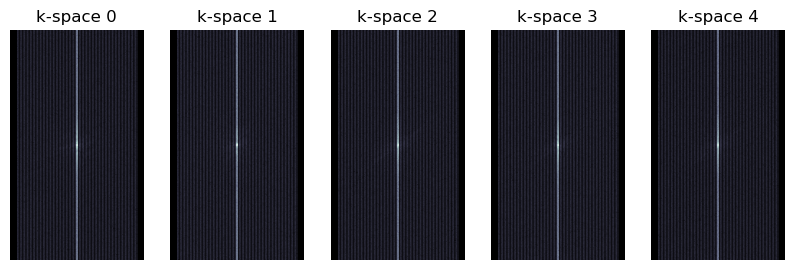

In [19]:
kspace, image = getinfo()
ksp = kspace[22]
mask = gen_mask(ksp,num_lines=30, num_central_lines=65)
mask_sm = gen_mask(ksp,num_lines=90, num_central_lines=5)
s = ksp * mask # undersample k-space data
s_sm = ksp * mask_sm # undersample k-space data only 10 lines in the middle part to check the effect of the sensitivity maps.
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(np.log(np.abs(s[i])+1e-8), cmap='bone')
    plt.axis('off')
    plt.title('k-space {}'.format(i))
plt.show()
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(np.log(np.abs(s_sm[i])+1e-8), cmap='bone')
    plt.axis('off')
    plt.title('k-space {}'.format(i))
plt.show()


In [5]:
img_rss = np.sum(np.abs(sp.ifft(s, axes=(-1, -2)))**2, axis=0)**0.5
mps = mr.app.EspiritCalib(s).run() # Sensitivity maps with undersample data
mps_ksp = mr.app.EspiritCalib(ksp).run() # Sensitivity maps with full data
mps_sm = mr.app.EspiritCalib(s_sm).run() # Sensitivity maps with undersample data only 10 lines in the middle part

EspiritCalib:   0%|          | 0/100 [00:00<?, ?it/s]

EspiritCalib:   0%|          | 0/100 [00:00<?, ?it/s]

EspiritCalib:   0%|          | 0/100 [00:00<?, ?it/s]

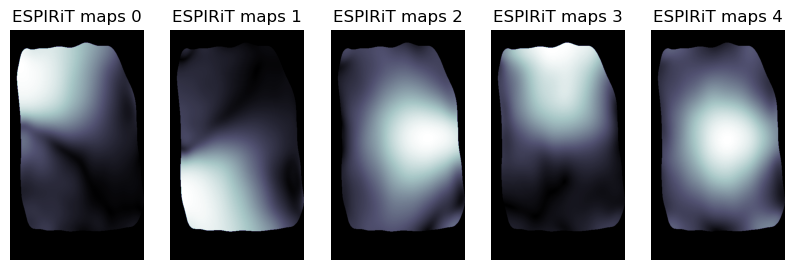

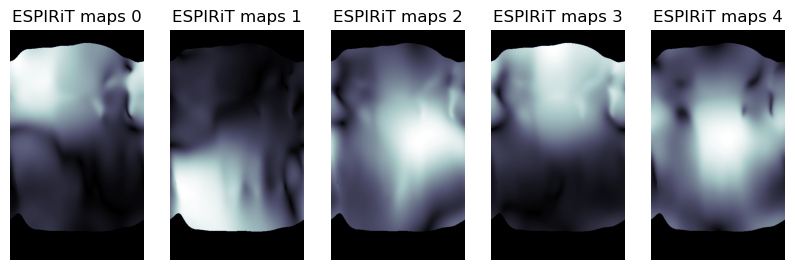

In [6]:
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(np.log(np.abs(mps[i])+1e-1), cmap='bone')
    plt.axis('off')
    plt.title('ESPIRiT maps {}'.format(i))
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(np.log(np.abs(mps_sm[i])+1e-1), cmap='bone')
    plt.axis('off')
    plt.title('ESPIRiT maps {}'.format(i))

In [7]:
lamda = [0.01, 0.1, 1, 10, 100]
img_sense = np.array([mr.app.SenseRecon(s, mps, lamda=l).run() for l in lamda])

SenseRecon:   0%|          | 0/100 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/100 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/100 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/100 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/100 [00:00<?, ?it/s]

## Effect of the lambda in SENSE

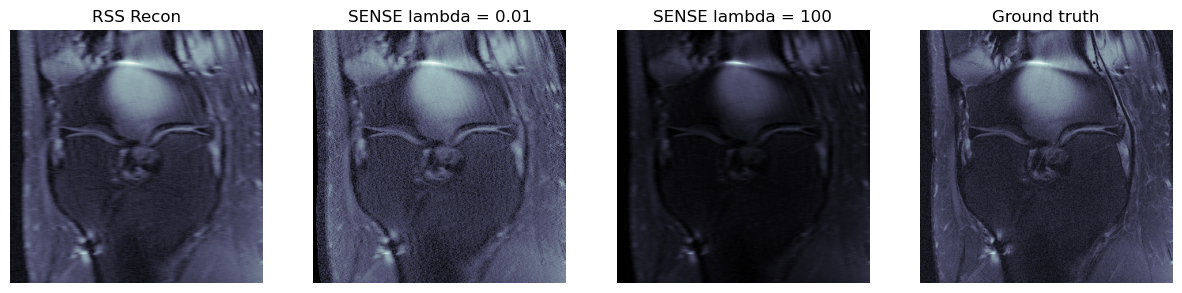

In [18]:
plt.figure(figsize=(15, 15))
plt.subplot(1, 4, 1)
plt.imshow(np.log(np.abs(img_rss[160:160+320, 25:25+320])+1e-5), cmap='bone')
plt.axis('off')
plt.title('RSS Recon')
plt.subplot(1, 4, 2)
plt.imshow(np.log(np.abs(img_sense[0][160:160+320, 25:25+320])+1e-5), cmap='bone')
plt.axis('off')
plt.title('SENSE lambda = 0.01')
plt.subplot(1, 4, 3)
plt.imshow(np.log(np.abs(img_sense[4][160:160+320, 25:25+320])+1e-5), cmap='bone')
plt.axis('off')
plt.title('SENSE lambda = 100')
plt.subplot(1, 4, 4)
plt.imshow(np.log(np.abs(image[22])+1e-5), cmap='bone')
plt.axis('off')
plt.title('Ground truth')
plt.show()

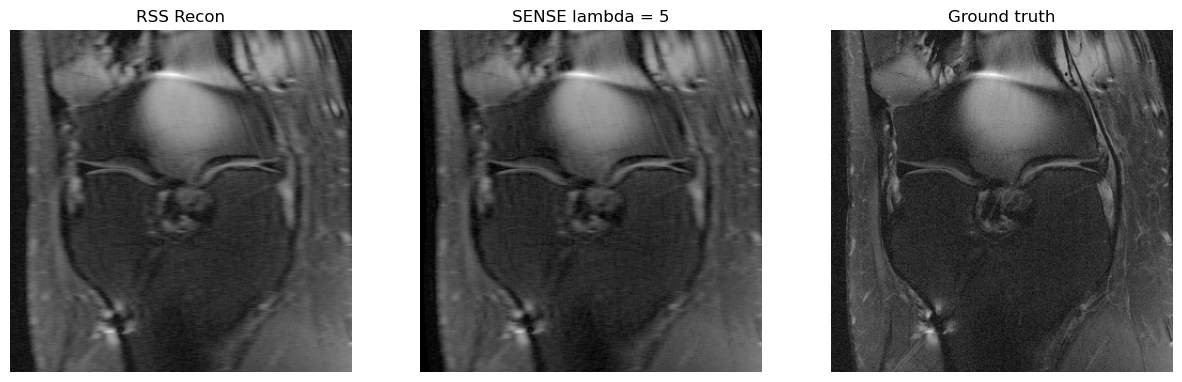

In [10]:
plt.figure(figsize=(15, 15))
plt.subplot(1, 3, 1)
plt.imshow(np.log(np.abs(img_rss[160:160+320, 25:25+320])+1e-5), cmap='gray')
plt.axis('off')
plt.title('RSS Recon')
plt.subplot(1, 3, 2)
plt.imshow(np.log(np.abs(img_sense[2][160:160+320, 25:25+320])+1e-5), cmap='gray')
plt.axis('off')
plt.title('SENSE lambda = 5')
plt.subplot(1, 3, 3)
plt.imshow(np.log(np.abs(image[22])+1e-5), cmap='gray')
plt.axis('off')
plt.title('Ground truth')
plt.show()

## Effect of sensitivity maps

In [11]:
lamda = 20
img_sense_sm_good = mr.app.SenseRecon(s, mps, lamda=lamda).run()
img_sense_sm_bad = mr.app.SenseRecon(s_sm, mps_sm, lamda=lamda).run()

SenseRecon:   0%|          | 0/100 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/100 [00:00<?, ?it/s]

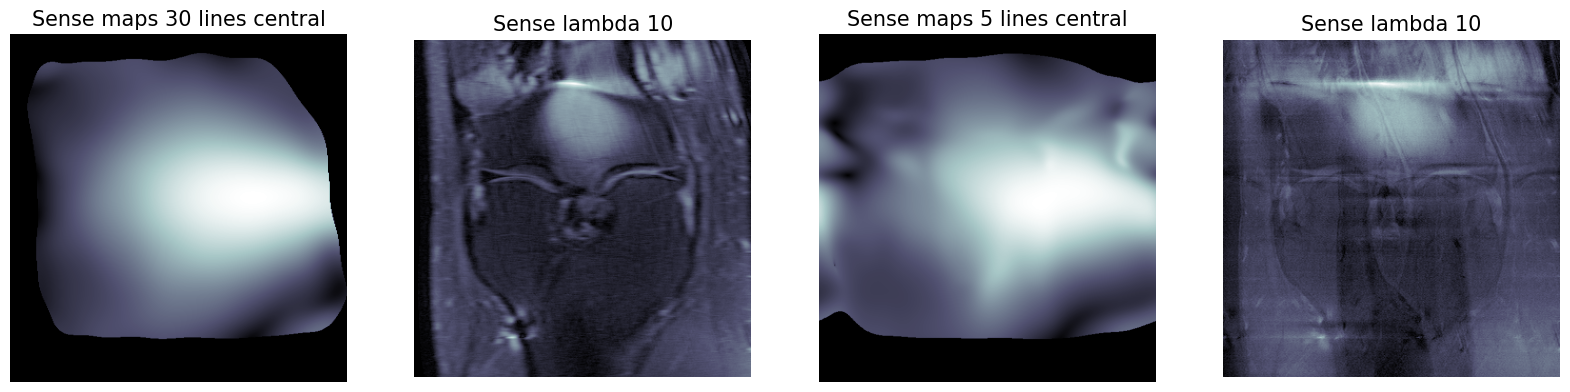

In [17]:
plt.figure(figsize=(20, 20))
plt.subplot(1, 4, 1)
plt.imshow(np.log(np.abs(mps[2])+1e-1), cmap='bone', aspect = 0.6)
plt.axis('off')
plt.title('Sense maps 30 lines central',fontsize=15)
plt.subplot(1, 4, 2)
plt.imshow(np.log(np.abs(img_sense_sm_good[160:160+320, 25:25+320])+1e-6), cmap='bone')
plt.axis('off')
plt.title('Sense lambda 10',fontsize=15)
plt.subplot(1, 4, 3)
plt.imshow(np.log(np.abs(mps_sm[2])+1e-1), cmap='bone', aspect = 0.6)
plt.axis('off')
plt.title('Sense maps 5 lines central', fontsize=15)
plt.subplot(1, 4, 4)
plt.imshow(np.log(np.abs(img_sense_sm_bad[160:160+320, 25:25+320])+1e-6), cmap='bone')
plt.axis('off')
plt.title('Sense lambda 10', fontsize=15)
plt.show()